In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel, chi2_contingency
from warnings import filterwarnings
filterwarnings("ignore")

In [4]:
# Problem 1
    
# Que1.1 a)

In [5]:
df = pd.read_csv('Wholesale Customer.csv')
df.head()
new_df = df[df.columns.difference(['Buyer/Spender'])]
df

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125


In [6]:
new_df.describe()

,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1524.870455,2881.493182,12000.297727,3071.931818,7951.277273,5796.265909
std,2820.105937,4767.854448,12647.328865,4854.673333,9503.162829,7380.377175
min,3.000000,3.000000,3.000000,25.000000,3.000000,55.000000
25%,408.250000,256.750000,3127.750000,742.250000,2153.000000,1533.000000
50%,965.500000,816.500000,8504.000000,1526.000000,4755.500000,3627.000000
75%,1820.250000,3922.000000,16933.750000,3554.250000,10655.750000,7190.250000
max,47943.000000,40827.000000,112151.000000,60869.000000,92780.000000,73498.000000


In [7]:
#Que1.1 b)

In [8]:
# df['Total']= df['Fresh']+df['Milk']+df['Grocery']+df['Frozen']+df['Detergents_Paper']+df['Delicatessen']
df['Total']= df.iloc[:,3:9].sum(axis =1)

In [9]:
df.groupby('Channel').agg({'Total':'sum'})

,Total
Channel,
Hotel,7999569
Retail,6619931


In [10]:
df.groupby('Region').agg({'Total':'sum'})

,Total
Region,
Lisbon,2386813
Oporto,1555088
Other,10677599


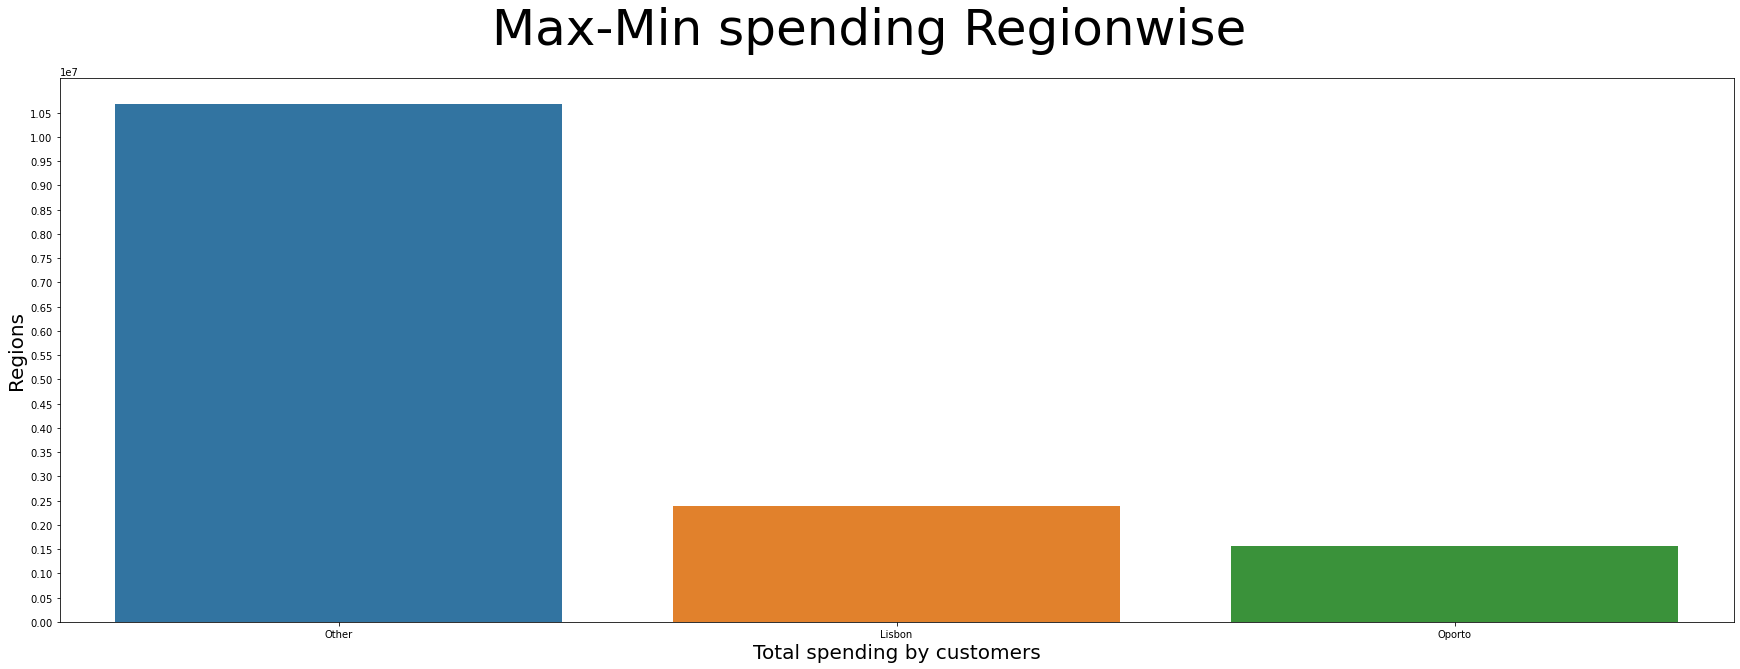

In [11]:
fig = plt.figure(figsize=(30,10))
fig.suptitle('Max-Min spending Regionwise', fontsize=50, ha='center')
sns.barplot(df['Region'],df['Total'],ci=None,estimator=np.sum);
plt.yticks(np.arange(0,11000000,500000))
plt.xlabel('Total spending by customers',fontsize=20)
plt.ylabel('Regions',fontsize=20)
plt.show();

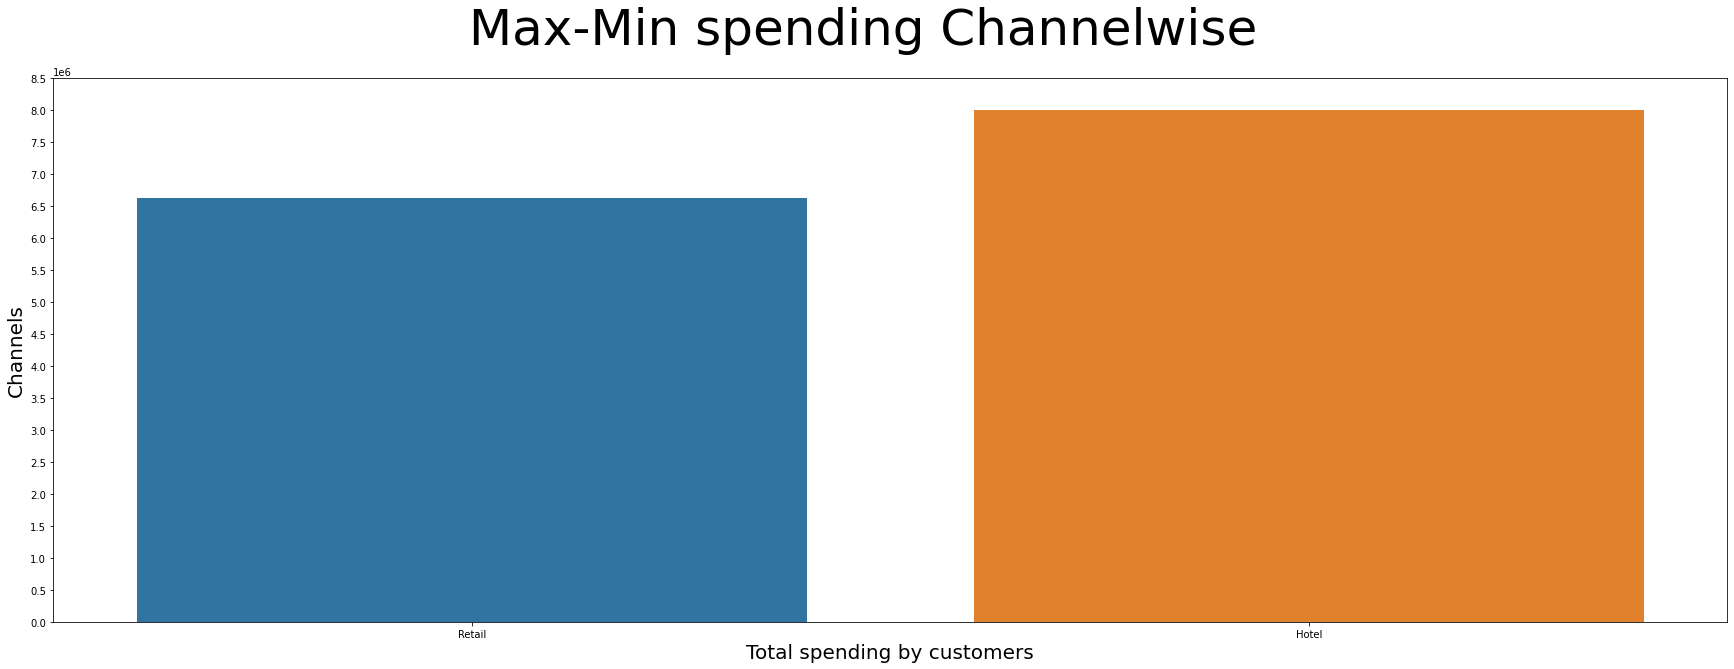

In [12]:
fig = plt.figure(figsize=(30,10))
fig.suptitle('Max-Min spending Channelwise', fontsize=50, ha='center')
sns.barplot(df['Channel'],df['Total'],ci=None,estimator=np.sum);
plt.yticks(np.arange(0,9000000,500000))
plt.xlabel('Total spending by customers',fontsize=20)
plt.ylabel('Channels',fontsize=20)
plt.show()

In [13]:
# Que1.2

In [14]:
# df1 = df[['Channel','Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']]
# df2 = df[['Region','Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']]
df1 = df.iloc[:,1:9]
df2 = df.iloc[:,2:9]

In [15]:
df1.groupby('Channel').describe().transpose()
df1

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,Hotel,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,Hotel,Other,29703,12051,16027,13135,182,2204
436,Hotel,Other,39228,1431,764,4510,93,2346
437,Retail,Other,14531,15488,30243,437,14841,1867
438,Hotel,Other,10290,1981,2232,1038,168,2125


In [16]:
df2.groupby('Region').describe().transpose()

Region                        Lisbon        Oporto          Other
Fresh            count     77.000000     47.000000     316.000000
                 mean   11101.727273   9887.680851   12533.471519
                 std    11557.438575   8387.899211   13389.213115
                 min       18.000000      3.000000       3.000000
                 25%     2806.000000   2751.500000    3350.750000
                 50%     7363.000000   8090.000000    8752.500000
                 75%    15218.000000  14925.500000   17406.500000
                 max    56083.000000  32717.000000  112151.000000
Milk             count     77.000000     47.000000     316.000000
                 mean    5486.415584   5088.170213    5977.085443
                 std     5704.856079   5826.343145    7935.463443
                 min      258.000000    333.000000      55.000000
                 25%     1372.000000   1430.500000    1634.000000
                 50%     3748.000000   2374.000000    3684.500000
                 75%     7503.000000   5772.500000    7198.750000
                 max    28326.000000  25071.000000   73498.000000
Grocery          count     77.000000     47.000000     316.000000
                 mean    7403.077922   9218.595745    7896.363924
                 std     8496.287728  10842.745314    9537.287778
                 min      489.000000   1330.000000       3.000000
                 25%     2046.000000   2792.500000    2141.500000
                 50%     3838.000000   6114.000000    4732.000000
                 75%     9490.000000  11758.500000   10559.750000
                 max    39694.000000  67298.000000   92780.000000
Frozen           count     77.000000     47.000000     316.000000
                 mean    3000.337662   4045.361702    2944.594937
                 std     3092.143894   9151.784954    4260.126243
                 min       61.000000    131.000000      25.000000
                 25%      950.000000    811.500000     664.750000
                 50%     1801.000000   1455.000000    1498.000000
                 75%     4324.000000   3272.000000    3354.750000
                 max    18711.000000  60869.000000   36534.000000
Detergents_Paper count     77.000000     47.000000     316.000000
                 mean    2651.116883   3687.468085    2817.753165
                 std     4208.462708   6514.717668    4593.051613
                 min        5.000000     15.000000       3.000000
                 25%      284.000000    282.500000     251.250000
                 50%      737.000000    811.000000     856.000000
                 75%     3593.000000   4324.500000    3875.750000
                 max    19410.000000  38102.000000   40827.000000
Delicatessen     count     77.000000     47.000000     316.000000
                 mean    1354.896104   1159.702128    1620.601266
                 std     1345.423340   1050.739841    3232.581660
                 min        7.000000     51.000000       3.000000
                 25%      548.000000    540.500000     402.000000
                 50%      806.000000    898.000000     994.000000
                 75%     1775.000000   1538.500000    1832.750000
                 max     6854.000000   5609.000000   47943.000000

In [18]:
df2.cov()
#To determine the covariance between combinations of all varieties, 2 at a time.

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.599549e+08,9.381789e+06,-1.424713e+06,2.123665e+07,-6.147826e+06,8.727310e+06
Milk,9.381789e+06,5.446997e+07,5.108319e+07,4.442612e+06,2.328834e+07,8.457925e+06
Grocery,-1.424713e+06,5.108319e+07,9.031010e+07,-1.854282e+06,4.189519e+07,5.507291e+06
Frozen,2.123665e+07,4.442612e+06,-1.854282e+06,2.356785e+07,-3.044325e+06,5.352342e+06
Detergents_Paper,-6.147826e+06,2.328834e+07,4.189519e+07,-3.044325e+06,2.273244e+07,9.316807e+05
Delicatessen,8.727310e+06,8.457925e+06,5.507291e+06,5.352342e+06,9.316807e+05,7.952997e+06


In [23]:
# cv = lambda x: df2.std(x, ddof=1)/np.mean(x)
# df2.apply(cv)

In [24]:
# Que1.3

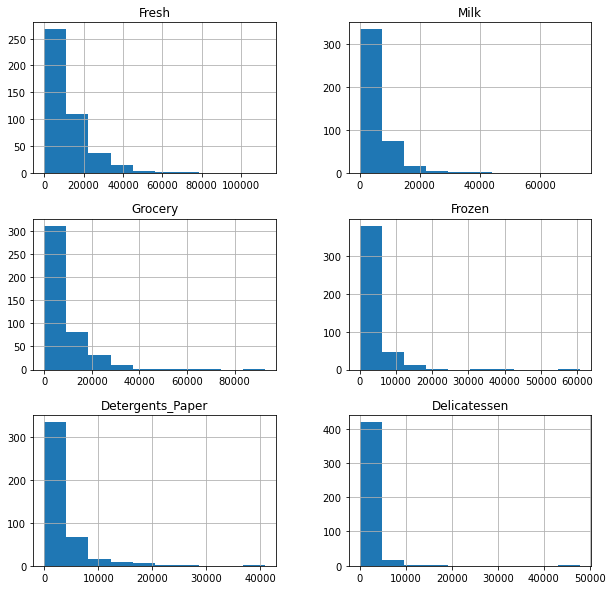

In [25]:
df1.hist(figsize=(10,10));

In [26]:
skewness = df1.skew(skipna=True)
skewness

Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicatessen        11.151586
dtype: float64

In [27]:
df_3 = df.iloc[:,3:9].transpose()
iqr = stats.iqr(df_3,axis=1)

In [28]:
ind = df_3.index.values
df_3[['IQR']]=iqr
df_3['IQR'].to_frame()

,IQR
Fresh,13806.00
Milk,5657.25
Grocery,8502.75
Frozen,2812.00
Detergents_Paper,3665.25
Delicatessen,1412.00


In [29]:
df1.groupby('Channel').std()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,
Hotel,13831.687502,4352.165571,3545.513391,5643.912500,1104.093673,3147.426922
Retail,8987.714750,9679.631351,12267.318094,1812.803662,6291.089697,1953.797047


In [30]:
df2.groupby('Region').std()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,
Lisbon,11557.438575,5704.856079,8496.287728,3092.143894,4208.462708,1345.423340
Oporto,8387.899211,5826.343145,10842.745314,9151.784954,6514.717668,1050.739841
Other,13389.213115,7935.463443,9537.287778,4260.126243,4593.051613,3232.581660


In [31]:
# Que1.3

<AxesSubplot:>

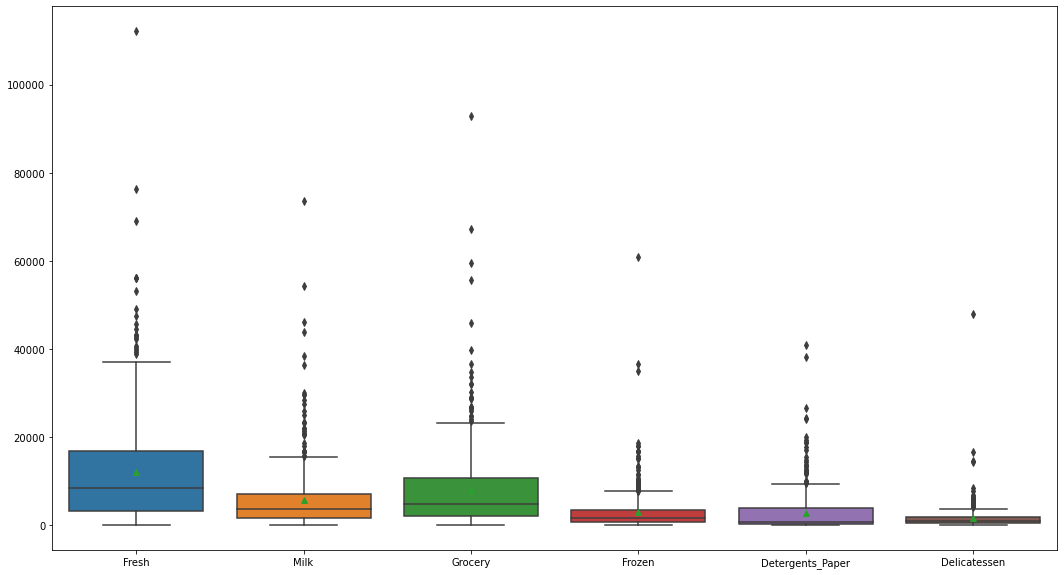

In [32]:
plt.figure(figsize=(18,10))
sns.boxplot(data = df1,showmeans=True)

<AxesSubplot:xlabel='Items', ylabel='Total amount of money spent by customers'>

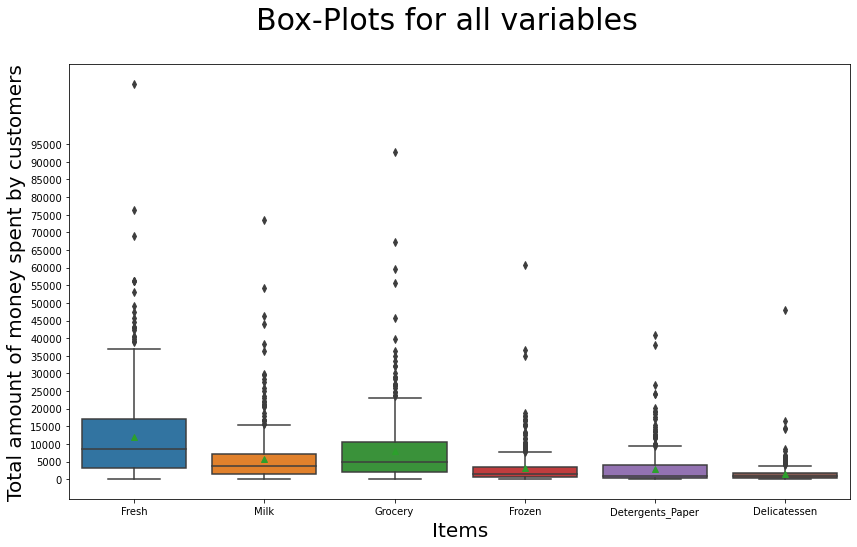

In [33]:
fig = plt.figure(figsize=(14,8))
fig.suptitle('Box-Plots for all variables', fontsize=30, ha='center')
plt.yticks(np.arange(0,100000,5000))
plt.xlabel('Items',fontsize=20)
plt.ylabel('Total amount of money spent by customers',fontsize=20)
sns.boxplot(data = df2,showmeans=True)

In [34]:
IQR_criteria = df_3['IQR'] *1.5
IQR_criteria

Fresh               20709.000
Milk                 8485.875
Grocery             12754.125
Frozen               4218.000
Detergents_Paper     5497.875
Delicatessen         2118.000
Name: IQR, dtype: float64

In [35]:
Max_Values = df.iloc[:,3:9].max()
Max_Values

Fresh               112151
Milk                 73498
Grocery              92780
Frozen               60869
Detergents_Paper     40827
Delicatessen         47943
dtype: int64

In [36]:
Min_Values = df.iloc[:,3:9].min()
Min_Values

Fresh                3
Milk                55
Grocery              3
Frozen              25
Detergents_Paper     3
Delicatessen         3
dtype: int64

In [37]:
df_corr = df.iloc[:,3:9].corr(method ='pearson')
df_corr

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


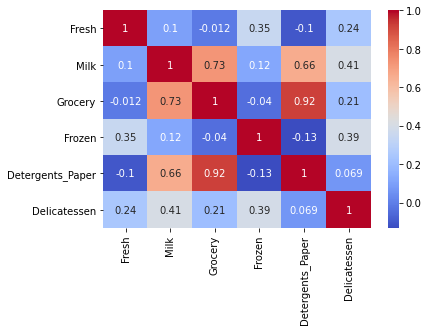

In [38]:
sns.heatmap(df_corr,annot=True , cmap='coolwarm');

In [39]:
# Problem 2

In [51]:
# Que2.1
mydata = pd.read_csv('Survey-1.csv')
mydata.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [52]:
ct_1 = pd.crosstab(mydata['Gender'],mydata['Major'],margins=True)
ct_2 = pd.crosstab(mydata['Gender'],mydata['Grad Intention'],margins=True)
ct_3 = pd.crosstab(mydata['Gender'],mydata['Employment'],margins=True)
ct_4 = pd.crosstab(mydata['Gender'],mydata['Computer'],margins=True)

In [53]:
TotalCount = len(mydata)
TotalCount

62

In [54]:
# Que2.2

In [55]:
# Males = mydata[mydata['Gender']=='Male'].index
MaleCount = ct_1['All']['Male']
MaleCount

29

In [56]:
FemaleCount = ct_1['All']['Female']
FemaleCount

33

In [57]:
#Que 2.2.1. 

In [58]:
Prob_Male = MaleCount/TotalCount
Prob_Male

0.46774193548387094

In [59]:
#Que 2.2.2. 

In [60]:
Prob_Female = FemaleCount/TotalCount
Prob_Female

0.532258064516129

In [61]:
# Que2.3 : Male

In [62]:
ct_1

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [63]:
Prob_MaleAccounting = ct_1['Accounting']['Male'] / MaleCount
Prob_MaleAccounting

0.13793103448275862

In [64]:
Prob_MaleCIS = ct_1['CIS']['Male'] / MaleCount
Prob_MaleCIS

0.034482758620689655

In [65]:
Prob_MaleEconomics_Finance = ct_1['Economics/Finance']['Male'] / MaleCount
Prob_MaleEconomics_Finance

0.13793103448275862

In [66]:
Prob_MaleInternationalBusiness = ct_1['International Business']['Male'] / MaleCount
Prob_MaleInternationalBusiness

0.06896551724137931

In [67]:
Prob_MaleManagement = ct_1['Management']['Male'] / MaleCount
Prob_MaleManagement

0.20689655172413793

In [68]:
Prob_MaleOther = ct_1['Other']['Male'] / MaleCount
Prob_MaleOther

0.13793103448275862

In [69]:
Prob_MaleRetailing_Marketing = ct_1['Retailing/Marketing']['Male'] / MaleCount
Prob_MaleRetailing_Marketing

0.1724137931034483

In [70]:
Prob_MaleUndecided = ct_1['Undecided']['Male'] / MaleCount
Prob_MaleUndecided

0.10344827586206896

In [71]:
# Que2.3 : Female

In [72]:
Prob_FemaleAccounting = ct_1['Accounting']['Female'] / FemaleCount
Prob_FemaleAccounting

0.09090909090909091

In [73]:
Prob_FemaleCIS = ct_1['CIS']['Female'] / FemaleCount
Prob_FemaleCIS

0.09090909090909091

In [74]:
Prob_FemaleEconomics_Finance = ct_1['Economics/Finance']['Female'] / FemaleCount
Prob_FemaleEconomics_Finance

0.21212121212121213

In [75]:
Prob_FemaleInternationalBusiness = ct_1['International Business']['Female'] / FemaleCount
Prob_FemaleInternationalBusiness

0.12121212121212122

In [76]:
Prob_FemaleManagement = ct_1['Management']['Female'] / FemaleCount
Prob_FemaleManagement

0.12121212121212122

In [77]:
Prob_FemaleOther = ct_1['Other']['Female'] / FemaleCount
Prob_FemaleOther

0.09090909090909091

In [78]:
Prob_FemaleRetailing_Marketing = ct_1['Retailing/Marketing']['Female'] / FemaleCount
Prob_FemaleRetailing_Marketing

0.2727272727272727

In [79]:
Prob_FemaleUndecided = ct_1['Undecided']['Female'] / FemaleCount
Prob_FemaleUndecided

0.0

In [81]:
# Que2.4

In [82]:
ct_2

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [62]:
Prob_Male_IntendsToGraduate = Prob_Male*(1-Prob_MaleUndecided)
round(Prob_Male_IntendsToGraduate*100,4)

41.9355

In [63]:
ct_4

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


In [64]:
Prob_FemaleHavingNoLaptop = 4/33
Prob_FemaleAndNoLaptop = Prob_Female * Prob_FemaleHavingNoLaptop
Prob_FemaleAndNoLaptop

0.06451612903225806

In [65]:
# Que2.5 a)

In [66]:
ct_3

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


In [67]:
Prob_FullTime = 10/62
Prob_MaleAndFullTime = 7/62
Prob_MaleOrFullTime = Prob_Male + Prob_FullTime - Prob_MaleAndFullTime
Prob_MaleOrFullTime

0.5161290322580645

In [68]:
# Que2.5 b)
ct_1

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [69]:
Prob_FemaleInternationalBusiness

0.12121212121212122

In [70]:
Prob_FemaleManagement

0.12121212121212122

In [71]:
Prob_InternationalBusinessOrManagementANDProb_Female = 8/62
Prob_InternationalBusinessORManagementGivenFemale = Prob_InternationalBusinessOrManagementANDProb_Female / Prob_Female
Prob_InternationalBusinessORManagementGivenFemale

0.24242424242424243

In [72]:
# Que2.6

In [73]:
# create a subset of data and then use it in the cross-tab function as required.
mydata_new = mydata[mydata['Grad Intention']!= 'Undecided']

In [74]:
ct_5 = pd.crosstab(mydata_new['Gender'],mydata_new['Grad Intention'],margins=True)
ct_5

Grad Intention,No,Yes,All
Gender,,,
Female,9,11,20
Male,3,17,20
All,12,28,40


In [75]:
Prob_GradIntention = 28/40
Prob_Female_new = 20/40
Prob_FemaleAndGrad_marginal = 11/40
# For independent events, P(A ∩ B) = P(A) * P(B)
Prob_FemaleAndGrad = Prob_Female_new * Prob_GradIntention
Prob_FemaleAndGrad

0.35

In [76]:
Prob_FemaleAndGrad_marginal
#Hence, graduate intention and being female are not independent events

0.275

In [77]:
# Que2.7 a)

In [78]:
CountOfGpaLessThan3 = len(mydata[mydata['GPA']<3])
CountOfGpaLessThan3

17

In [79]:
ProbOfGpaLessThan3 = CountOfGpaLessThan3/TotalCount
ProbOfGpaLessThan3

0.27419354838709675

In [80]:
# Que2.7 b)

In [81]:
mydata1 = mydata[mydata['Salary']>=50]

In [82]:
ct_6 = pd.crosstab(mydata1['Gender'],mydata1['Salary'],margins=True)
ct_6

Salary,50.0,52.0,54.0,55.0,60.0,65.0,70.0,78.0,80.0,All
Gender,,,,,,,,,,
Female,5,0,0,5,5,0,1,1,1,18
Male,4,1,1,3,3,1,0,0,1,14
All,9,1,1,8,8,1,1,1,2,32


In [83]:
ProbOfRandomMaleBeingSelected_Given50OrMoreSalary = 14/32

In [84]:
ProbOfRandomFemaleBeingSelected_Given50OrMoreSalary = 18/32

In [85]:
ProbOfRandomMaleBeingSelected = Prob_Male

In [86]:
ProbOfRandomFemaleBeingSelected = Prob_Female

In [87]:
# Que2.8

In [88]:
mydata_new = mydata[['GPA','Salary','Spending','Text Messages']]
mydata_new.describe()

,GPA,Salary,Spending,Text Messages
count,62.000000,62.000000,62.000000,62.000000
mean,3.129032,48.548387,482.016129,246.209677
std,0.377388,12.080912,221.953805,214.465950
min,2.300000,25.000000,100.000000,0.000000
25%,2.900000,40.000000,312.500000,100.000000
50%,3.150000,50.000000,500.000000,200.000000
75%,3.400000,55.000000,600.000000,300.000000
max,3.900000,80.000000,1400.000000,900.000000


In [89]:
mydata_new.cov()

,GPA,Salary,Spending,Text Messages
GPA,0.142422,-1.407166,-28.764410,3.415124
Salary,-1.407166,145.948440,9.122158,-190.797197
Spending,-28.764410,9.122158,49263.491539,1356.127710
Text Messages,3.415124,-190.797197,1356.127710,45995.643839


In [90]:
skewness = mydata_new.skew()
print('Skewness :\n',skewness)

Skewness :
 GPA             -0.314600
Salary           0.534701
Spending         1.585915
Text Messages    1.295808
dtype: float64


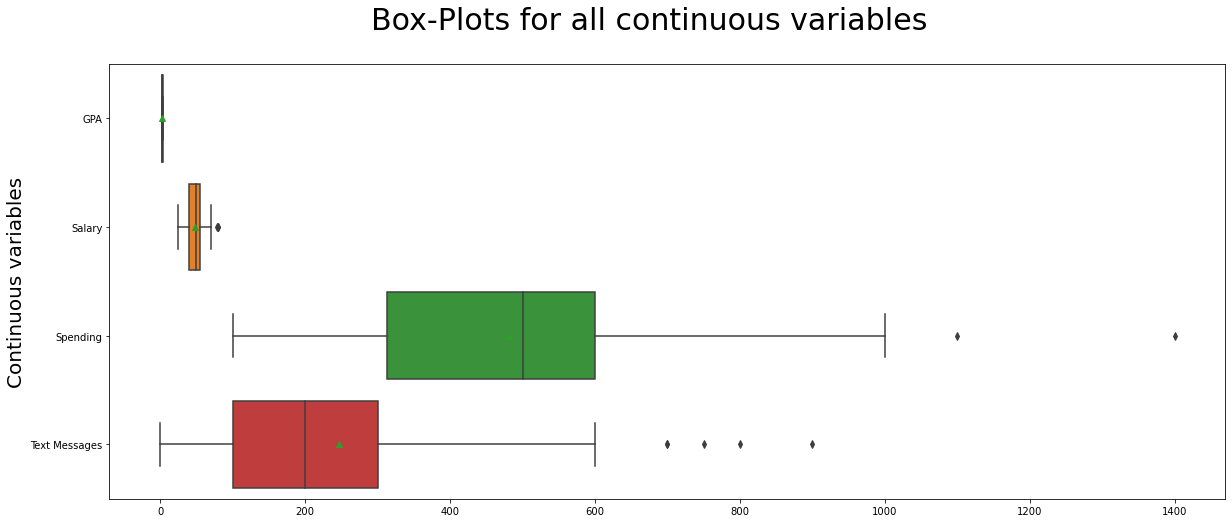

In [91]:
fig = plt.figure(figsize=(20,8))
fig.suptitle('Box-Plots for all continuous variables', fontsize=30, ha='center')
plt.ylabel('Continuous variables',fontsize=20)
sns.boxplot(data = mydata_new,orient='h',showmeans=True);

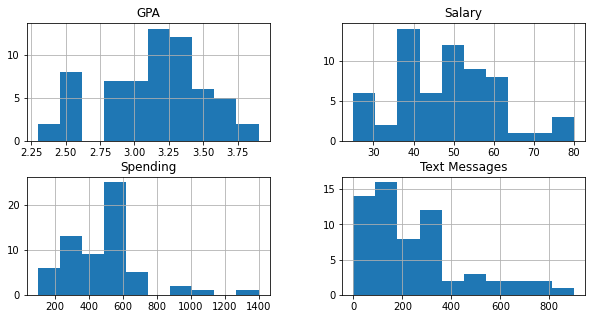

In [92]:
mydata_new.hist(figsize=(10,5));

In [93]:
mydata_new.mean()

GPA                3.129032
Salary            48.548387
Spending         482.016129
Text Messages    246.209677
dtype: float64

In [94]:
mydata_new.median()

GPA                3.15
Salary            50.00
Spending         500.00
Text Messages    200.00
dtype: float64

In [95]:
mydata_new.mode()

,GPA,Salary,Spending,Text Messages
0,3.0,40.0,500.0,300.0
1,3.1,NaN,NaN,NaN
2,3.4,NaN,NaN,NaN


In [96]:
# Problem 3
# Que3.1

In [97]:
data = pd.read_csv('A & B shingles.csv')
data.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [98]:
data.describe()

,A,B
count,36.000000,31.000000
mean,0.316667,0.273548
std,0.135731,0.137296
min,0.130000,0.100000
25%,0.207500,0.160000
50%,0.290000,0.230000
75%,0.392500,0.400000
max,0.720000,0.580000


In [99]:
data.isnull().sum()
# There are 5 missing values in Column 'B' of the dataset provided.

A    0
B    5
dtype: int64

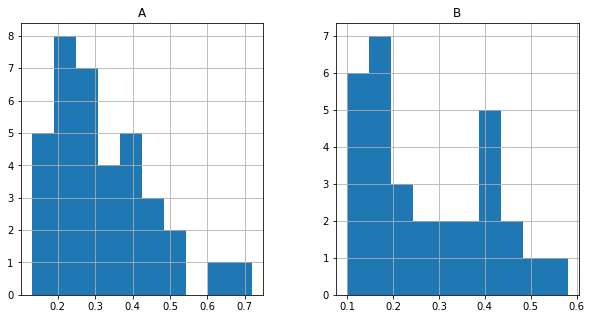

In [100]:
data.hist(figsize=(10,5));

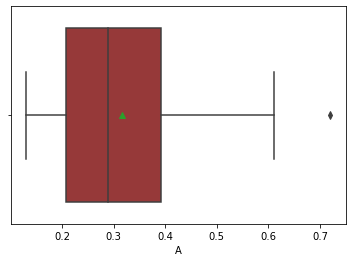

In [101]:
sns.boxplot(x=data['A'],color='brown',showmeans =True);

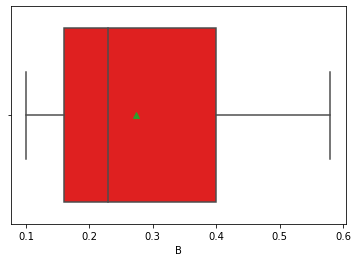

In [102]:
sns.boxplot(x=data['B'],color='red',showmeans =True);

In [103]:
PopMean = 0.35

In [104]:
m1 = data['A'].mean()
m1

0.3166666666666666

In [105]:
stdev1 = data['A'].std()
stdev1

0.13573082605973166

In [106]:
m2 = data['B'].mean()
m2

0.2735483870967742

In [107]:
stdev2 = data['B'].std()
stdev2

0.13729647694185443

## For Sample : A
## Step 1: Define null and alternative hypotheses

Null hypothesis states that mean moisture content 𝜇 =< 0.35

Alternative hypothesis states that the mean moisture content 𝜇 > 0.35

𝐻0 :  𝜇  =< 0.35
𝐻𝐴 :  𝜇   > 0.35

## Step 2: Decide the significance level

Here we select  𝛼  = 0.05

## Step 3: Identify the test statistic

In [108]:
t_statistic, p_value  =  stats.ttest_1samp(data['A'],PopMean,nan_policy='omit')
print('tstat  %1.3f' % t_statistic)    
print("p-value for one-tail  %1.3f" % p_value)

tstat  -1.474
p-value for one-tail  0.150


In [109]:
# p_value > 0.05 => failed to reject Null hypothesis
alpha_value = 0.05 
print('Level of significance: %.2f' %alpha_value)
if p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 

print ("Our one-sample t-test p-value=", p_value/2)

Level of significance: 0.05
We have no evidence to reject the null hypothesis since p value > Level of significance
Our one-sample t-test p-value= 0.07477633144907513


## For Sample : B
## Step 1: Define null and alternative hypotheses

Null hypothesis states that mean moisture content 𝜇 =< 0.35

Alternative hypothesis states that the mean moisture content 𝜇 > 0.35

𝐻0 :  𝜇  =< 0.35
𝐻𝐴 :  𝜇   > 0.35

## Step 2: Decide the significance level

The level of significance (Alpha ) = 0.05.

## Step 3: Identify the test statistic

In [110]:
t_statistic, p_value  =  stats.ttest_1samp(data['B'],PopMean,nan_policy='omit')
print('tstat  ',t_statistic)    
print('p-value for one-tail  ', (p_value/2)) 

tstat   -3.1003313069986995
p-value for one-tail   0.0020904774003191826


In [111]:
# p_value < 0.05 => Rejected Null hypothesis
alpha_value = 0.05 
print('Level of significance: %.2f' %alpha_value)
if p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 

print ("Our one-sample t-test p-value=", p_value/2)

Level of significance: 0.05
We have evidence to reject the null hypothesis since p value < Level of significance
Our one-sample t-test p-value= 0.0020904774003191826


In [112]:
# Que3.2

## Step 1: Define null and alternative hypotheses 

Null hypothesis states that the population mean moisture content for A & B are equal 

Alternative hypothesis states that the mean moisture content for A & B are not equal 𝜇(A) ≠ 𝜇(B) 

𝐻0 : 𝜇(A) = 𝜇(B) 
𝐻𝐴 : 𝜇(A) ≠ 𝜇(B) 

## Step 2: Decide the significance level

The level of significance (Alpha ) = 0.05.

## Step 3: Identify the test statistic

* We have two samples and we do not know the population standard deviation.
* The sample is not a large sample, n < 30. So you use the t distribution and the  𝑡𝑆𝑇𝐴𝑇  test statistic for two sample unpaired test.

## Step 4: Calculate the p - value and test statistic

* We use the scipy.stats.ttest_ind to calculate the t-test for the means of TWO INDEPENDENT samples of scores given the two sample observations. This function returns t statistic and two-tailed p value.
* This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances.
* For this exercise, we are going to first assume that the variance is equal and then compute the necessary statistical values.

In [113]:
t_statistic, p_value  = ttest_ind(data['A'],data['B'],nan_policy='omit')
print('tstat',t_statistic)    
print('p-value',p_value) 

tstat 1.2896282719661123
p-value 0.2017496571835306


### Step 5:  Decide to reject or accept null hypothesis

In [114]:
print ("two-sample t-test p-value=", p_value)

alpha_level = 0.05

if p_value < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that the mean time to deliver luggages in of both the wings of the hotel are not same.')
else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that the population mean for shingles A and B are equal')

two-sample t-test p-value= 0.2017496571835306
We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis
We conclude that the population mean for shingles A and B are equal
